In [1]:
import numpy as np
import cvxpy as cp

### Data generation

In [2]:
#######
# DATA, do not change this part!
#######
a=[0.5, -0.5, 0.2, -0.7, 0.6, -0.2, 0.7, -0.5, 0.8, -0.4]
l=[40, 20, 40, 40, 20, 40, 30, 40, 30, 60]
Preq=np.arange(a[0],a[0]*(l[0]+0.5),a[0])
for i in range(1, len(l)):
    Preq=np.r_[ Preq, np.arange(Preq[-1]+a[i],Preq[-1]+a[i]*(l[i]+0.5),a[i]) ]

T = sum(l)

Peng_max = 20.0
Pmg_min = -6.0
Pmg_max = 6.0
eta = 0.1
gamma = 0.1
#####
# End of DATA part
#####

In [3]:
Ebatt_max = 100

### Task 1: Solve your convex program with cvxpy library 

In [78]:
Ebatt_max = 100
eps = 0.0001

Peng = cp.Variable(T)
Pmg = cp.Variable(T)
Pbr = cp.Variable(T)
E = cp.Variable(T + 1)

constraints = [Preq == Peng + Pmg - Pbr,
               Peng >= 0,
               Peng <= Peng_max,
               Pmg >= Pmg_min,
               Pmg <= Pmg_max,
               0 <= Pbr,
               0 <= E,
               E <= Ebatt_max,
               E[0] == E[T]]

for t in range(T):
    constraints += [E[t+1] - E[t] + Pmg[t] <= eta*Pmg[t],
                    eta*Pmg[t] <= E[t] - E[t+1] - Pmg[t]]


objective = cp.sum(Peng + gamma*cp.square(Peng) + eps*cp.maximum(0, -Pmg)) 

problem = cp.Problem(cp.Minimize(objective), constraints)
objective_value = problem.solve(solver=cp.OSQP, eps_rel= 1e-7)
print(objective_value)

5077.561656855312


In [76]:
count = 0
for t in range(T):
    rhs = eta*Pmg[t].value
    lhs = E[t+1].value - E[t].value + Pmg[t].value
    if abs(rhs - lhs) > 0.0003 and abs(-rhs - lhs) > 0.0003:
        count += 1
        print(eta*Pmg[t].value, + E[t+1].value - E[t].value + Pmg[t].value, "=", eta*Pmg[t].value + E[t+1].value - E[t].value + Pmg[t].value)
print(count)

0


In [77]:
diff = (abs(5077.526349321675-objective_value))
print(diff)

0.35359065713237214


In [74]:
diff = (abs(5077.525158522512- sum(Peng.value + gamma*(Peng.value)*Peng.value)))
print(diff)

0.0011265217417530948


#### Plotting the results

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

f = plt.figure()
# Plot P_eng.
ax = f.add_subplot(411)
plt.plot(Peng[:].value.round(3))
plt.ylabel(r"Peng", fontsize=16)

# Plot P_br.
plt.subplot(4,1,2)
x1 = Pbr[:].value.round(3)
plt.plot(x1)
plt.ylabel(r"Pbr", fontsize=16)

# Plot P_mg.
plt.subplot(4,1,3)
plt.plot(Pmg[:].value.round(3))
plt.ylabel(r"Pmg", fontsize=16)

# Plot E
plt.subplot(4,1,4)
x2 = E[:360].value.round(3)
plt.plot(range(360), x2)
plt.ylabel(r"E", fontsize=16)
plt.tight_layout()

plt.show()

### Task 2: comparison with a battery-less car

In [228]:
Ebatt_max = 0

In [68]:
Ebatt_max = 0
eps = 0.0001

Peng = cp.Variable(T)
Pmg = cp.Variable(T)
Pbr = cp.Variable(T)
E = cp.Variable(T + 1)
z = cp.Variable(T)

constraints = [Preq == Peng + Pmg - Pbr,
               Peng >= 0,
               Peng <= Peng_max,
               Pmg >= Pmg_min,
               Pmg <= Pmg_max,
               0 <= Pbr,
               0 <= E,
               E <= Ebatt_max,
               E[0] == E[T]]

for t in range(T):
    constraints += [E[t+1] - E[t] + Pmg[t] <= eta*Pmg[t],
                    eta*Pmg[t] <= E[t] - E[t+1] - Pmg[t]]


objective = cp.sum(Peng + gamma*cp.square(Peng) + eps*cp.maximum(0, -Pmg)) 

problem = cp.Problem(cp.Minimize(objective), constraints)
objective_value = problem.solve()
print(objective_value)


5896.808999997178


In [69]:
diff = (abs(5896.808985648918-objective_value))
print(diff)

1.4348260265251156e-05


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

f = plt.figure()
# Plot P_eng.
ax = f.add_subplot(411)
plt.plot(Peng[:].value.round(3))
plt.ylabel(r"Peng", fontsize=16)

# Plot P_br.
plt.subplot(4,1,2)
x1 = Pbr[:].value.round(3)
plt.plot(x1)
plt.ylabel(r"Pbr", fontsize=16)

# Plot P_mg.
plt.subplot(4,1,3)
plt.plot(Pmg[:].value.round(3))
plt.ylabel(r"Pmg", fontsize=16)


# Plot E
plt.subplot(4,1,4)
x2 = E[:360].value.round(3)
plt.plot(range(360), x2)
plt.ylabel(r"E", fontsize=16)
plt.tight_layout()

plt.show()

### Task 3: handle glitches

In [57]:
Ebatt_max = 0
eps = 0.01

In [58]:
Peng = cp.Variable(T)
Pmg = cp.Variable(T)
Pbr = cp.Variable(T)
E = cp.Variable(T + 1)
z = cp.Variable(T+1)

constraints = [Preq == Peng + Pmg - Pbr,
               Peng >= 0,
               Peng <= Peng_max,
               Pmg >= Pmg_min,
               Pmg <= Pmg_max,
               0 <= Pbr,
               0 <= E,
               E <= Ebatt_max,
               E[0] == E[T]]

for t in range(T):
    constraints += [z[t] >= -Pmg[t],
                    z[t] >= Pmg[t]]
    constraints += [E[t+1] == E[t] - Pmg[t] - eta*z[t]]


objective = cp.sum(Peng + gamma*cp.square(Peng) + eps*cp.maximum(0, -Pmg)) 

problem = cp.Problem(cp.Minimize(objective), constraints)
problem.solve()

5896.808998642213

#### Plot

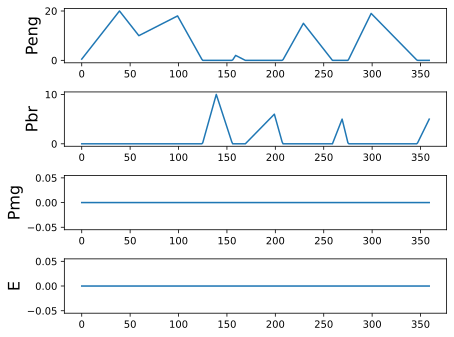

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

f = plt.figure()
# Plot P_eng.
ax = f.add_subplot(411)
plt.plot(Peng[:].value.round(3))
plt.ylabel(r"Peng", fontsize=16)

# Plot P_br.
plt.subplot(4,1,2)
x1 = Pbr[:].value.round(3)
plt.plot(x1)
plt.ylabel(r"Pbr", fontsize=16)

# Plot P_mg.
plt.subplot(4,1,3)
plt.plot(Pmg[:].value.round(3))
plt.ylabel(r"Pmg", fontsize=16)

# Plot E
plt.subplot(4,1,4)
x2 = E[:360].value.round(3)
plt.plot(range(360), x2)
plt.ylabel(r"E", fontsize=16)
plt.tight_layout()

plt.show()